In [2]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.6905 - loss: 0.5445 - val_accuracy: 0.8636 - val_loss: 0.3172
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9694 - loss: 0.0985 - val_accuracy: 0.8339 - val_loss: 0.4493
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9961 - loss: 0.0161 - val_accuracy: 0.8468 - val_loss: 0.5061
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.8496 - val_loss: 0.5480
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 1.0000 - loss: 4.7200e-04 - val_accuracy: 0.8511 - val_loss: 0.5684


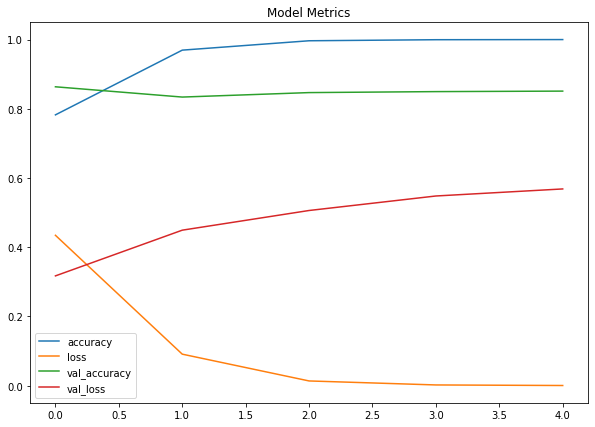

In [12]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.5020 - accuracy: 0.8661
Test Accuracy: 0.8661199808120728


In [13]:
y_pred = model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


In [16]:
y_pred

array([[4.4813273e-03],
       [9.9999833e-01],
       [3.5806501e-01],
       ...,
       [7.6598744e-03],
       [7.7849359e-04],
       [9.3456751e-01]], dtype=float32)

In [17]:
y_pred = y_pred.flatten()

In [19]:
y_pred

array([4.4813273e-03, 9.9999833e-01, 3.5806501e-01, ..., 7.6598744e-03,
       7.7849359e-04, 9.3456751e-01], dtype=float32)

In [20]:
y_pred = (y_pred > 0.5).astype(int)

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



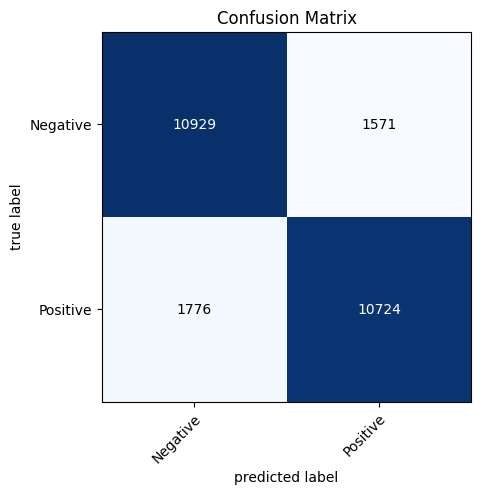

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()